In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [4]:
df = pd.read_csv("C:/Users/navir/Downloads/data_for_predictions.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have X (features) and y (labels) prepared

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier with specified parameters
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [12]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predictions

,Actual,Predicted
4947,0,0
5868,0,0
6805,0,0
1323,0,0
11759,0,0
...,...,...
8846,0,0
4075,0,0
11619,0,0
2992,0,0


# ACCURACY
Provides an overall measure of the model's correctness

In [48]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8959616700889802


# PRECISION, RECALL, F1
high precision is important if the cost of false positives is high 
High recall is crucial if the cost of false negatives is high

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [18]:
precision

1.0

NO FALSE POSITIVES MADE BY THE MODEL

In [19]:
recall

0.003278688524590164

SINCE WE NEED NOT CONSIDER MUCH OF TRUE POSITIVES, THAT'S TRUE NEGATIVES A MORE THAN TRUE POSITIVES IN OUR MODEL! NO CHURN IS MORE SIGNIFICANT THAN CHURN BEING PRESENT. SO RECALL VALUE BEING LESS DOESN'T MATTER

In [20]:
f1

0.006535947712418301

AS RECALL DOESN'T MATTER MUCH, f1 Score too doesn't matter! 

# CONFUSION MATRIX
Provides a detailed breakdown of true positives, true negatives, false positives, and false negatives.

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[2617,    0],
       [ 304,    1]], dtype=int64)

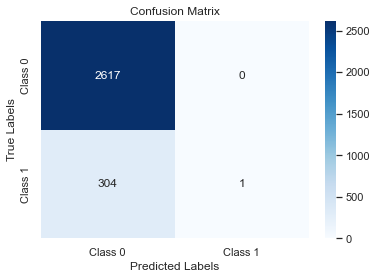

In [49]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a labeled and colorful confusion matrix using seaborn
class_labels = ["Class 0", "Class 1"]  # Replace with your actual class labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(X_test)

# Extract the predicted probabilities for the positive class (class 1)
y_pred_proba_class_1 = y_pred_proba[:, 1]

# Print or use the predicted probabilities
print(y_pred_proba_class_1)

[0.08053474 0.1333907  0.0738044  ... 0.05619864 0.06372932 0.12440358]


# AUC-ROC 
Measures the model's ability to discriminate between positive and negative instances

In [27]:
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, y_pred_proba_class_1)

In [28]:
auc_roc

0.6389389677831581

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_class_1)

In [46]:
df_roc = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Thresholds': thresholds})
df_roc.head()

,False Positive Rate,True Positive Rate,Thresholds
0,0.000000,0.000000,1.513130
1,0.000000,0.003279,0.513130
2,0.000000,0.009836,0.282559
3,0.000382,0.009836,0.260876
4,0.001146,0.009836,0.252107


# ROC CURVE 

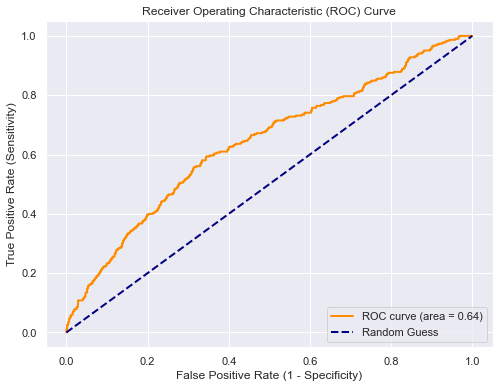

In [44]:
from sklearn.metrics import roc_curve, auc
# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# MAE, MSE
MIGHT NOT BE APPROPRIATE SINCE IT'S A CLASSIFIER MODEL! JUST CHECKED OUT!:)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.10403832991101986

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.10403832991101986